## 3.4 NetworkXを用いてネットワークの特徴を知る

### 3.4.1 分析の準備

In [1]:
# 必要なライブラリのインストール
# !pip install networkx numpy matplotlib pandas
# !pip install torch_geometric

In [2]:
# 必要なライブラリのインポート
import networkx as nx
from torch_geometric.loader import DataLoader
from torch_geometric.datasets import Planetoid
from torch_geometric.utils.convert import (
    to_networkx,
    from_networkx,
)

# データハンドリングや可視化に必要なライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = Planetoid(root="./dataset", name="PubMed")
G = to_networkx(dataset.data, to_undirected=True)

/home/hosaka@gees.local/.pyenv/versions/3.10.1/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


### 3.4.2 ネットワーク全体の概形を見る

In [4]:
# |V|
print("ノードの数（ネットワークの大きさ）:", G.number_of_nodes())

# |E|
print("エッジの数:", G.number_of_edges())

# 密度
print("ネットワークの密度:", nx.density(G))
# 愚直に算出する場合
print(
    "ネットワークの密度:",
    (
        G.number_of_edges() * 2
        / (
            G.number_of_nodes()
            * (G.number_of_nodes() - 1)
        )
    ),
)

# 直径
# すべてのノード間で最短経路を算出するため時間がかかる
print("ネットワークの直径:", nx.diameter(G))

ノードの数（ネットワークの大きさ）: 19717
エッジの数: 44324
ネットワークの密度: 0.00022803908825811382
ネットワークの密度: 0.00022803908825811382
ネットワークの直径: 18


In [5]:
# 連結しているかどうかの判別
print("連結しているか:", nx.is_connected(G))

# 連結成分の数の算出
print("連結成分の数:", nx.number_connected_components(G))

# 各連結成分を構成するノード集合
components = nx.connected_components(G)
# 最大連結成分のノード集合を取得
nodes_lagest_component = max(components, key=len)
# 最大連結成分を部分グラフとして取得
subg = G.subgraph(nodes_lagest_component).copy()

print("最大連結成分の大きさ:", len(subg))

連結しているか: True
連結成分の数: 1
最大連結成分の大きさ: 19717


### 3.4.3 個々のノードについての特徴を計算する

In [24]:
# 次数中心性
degree_c = G.degree()

# 全ノードの次数中心性が出力されるためコメントアウト
# print(degree_c)

In [7]:
# 辞書形式への変換
dict_degree = dict(degree_c)
print(dict_degree)

# リスト形式への変換
list_degree = list(dict_degree.values())
print(list_degree)

# DataFrameオブジェクトの形に整理
df_degree = pd.DataFrame(
    list(degree_c),
    columns=["node_id", "degree"],
)
print(df_degree.head())

{0: 5, 1: 3, 2: 3, 3: 1, 4: 1, 5: 2, 6: 22, 7: 17, 8: 1, 9: 9, 10: 6, 11: 1, 12: 10, 13: 1, 14: 1, 15: 6, 16: 29, 17: 6, 18: 8, 19: 8, 20: 1, 21: 2, 22: 2, 23: 1, 24: 4, 25: 1, 26: 5, 27: 3, 28: 1, 29: 2, 30: 1, 31: 1, 32: 1, 33: 1, 34: 3, 35: 17, 36: 1, 37: 1, 38: 4, 39: 1, 40: 8, 41: 4, 42: 1, 43: 1, 44: 1, 45: 1, 46: 11, 47: 31, 48: 18, 49: 2, 50: 1, 51: 1, 52: 1, 53: 1, 54: 6, 55: 2, 56: 1, 57: 3, 58: 7, 59: 3, 60: 25, 61: 1, 62: 22, 63: 1, 64: 2, 65: 3, 66: 1, 67: 2, 68: 1, 69: 7, 70: 1, 71: 3, 72: 5, 73: 1, 74: 1, 75: 1, 76: 3, 77: 9, 78: 1, 79: 2, 80: 3, 81: 2, 82: 1, 83: 2, 84: 3, 85: 7, 86: 6, 87: 1, 88: 14, 89: 1, 90: 1, 91: 2, 92: 1, 93: 1, 94: 1, 95: 4, 96: 1, 97: 2, 98: 1, 99: 13, 100: 2, 101: 19, 102: 3, 103: 2, 104: 1, 105: 15, 106: 1, 107: 1, 108: 5, 109: 2, 110: 23, 111: 1, 112: 17, 113: 2, 114: 1, 115: 2, 116: 24, 117: 27, 118: 2, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 16, 125: 1, 126: 1, 127: 2, 128: 1, 129: 7, 130: 1, 131: 2, 132: 11, 133: 1, 134: 1, 135: 1, 1

In [9]:
# 固有ベクトル中心性
eigen_c = nx.eigenvector_centrality(G)

# 近接中心性
# 時間がかかる
# closeness_c = nx.closeness_centrality(G)

# 媒介中心性
# 時間がかかる
# betweenness_c = nx.betweenness_centrality(G)

# ページランク
pagerank_c = nx.pagerank(G, alpha=0.5)

# 局所クラスター係数
local_clustering = nx.clustering(G)

In [10]:
# ダイクストラ法により最短経路を求める
print(
    nx.shortest_path(G, source=0, target=1, method="dijkstra")
)
# すべての最短経路
print(
    [
        path
        for path in nx.all_shortest_paths(
            G,
            source=0,
            target=1,
        )
    ]
)

[0, 1544, 2110, 7780, 5966, 2943, 1]
[[0, 1544, 2110, 7780, 5966, 2943, 1], [0, 6092, 7191, 15864, 13705, 8359, 1], [0, 6092, 16772, 11449, 10051, 8359, 1], [0, 14442, 8372, 6039, 10487, 8359, 1]]


In [11]:
df_centrality = pd.DataFrame(
    {
        "degree": list_degree,
        "eigen": dict(eigen_c).values(),
        # "betweenness": dict(betweenness_c).values(),
        "pagerank": dict(pagerank_c).values(),
        "local_clustering": dict(local_clustering).values(),
    }
)
print(df_centrality.describe().round(3))

          degree      eigen   pagerank  local_clustering
count  19717.000  19717.000  19717.000         19717.000
mean       4.496      0.001      0.000             0.060
std        7.431      0.007      0.000             0.182
min        1.000      0.000      0.000             0.000
25%        1.000      0.000      0.000             0.000
50%        2.000      0.000      0.000             0.000
75%        4.000      0.000      0.000             0.000
max      171.000      0.172      0.001             1.000


In [12]:
print(df_centrality.corr().round(2))

                  degree  eigen  pagerank  local_clustering
degree              1.00   0.51      0.87              0.04
eigen               0.51   1.00      0.20              0.04
pagerank            0.87   0.20      1.00             -0.02
local_clustering    0.04   0.04     -0.02              1.00


### 3.4.4 ネットワーク全体を見渡し傾向を知る

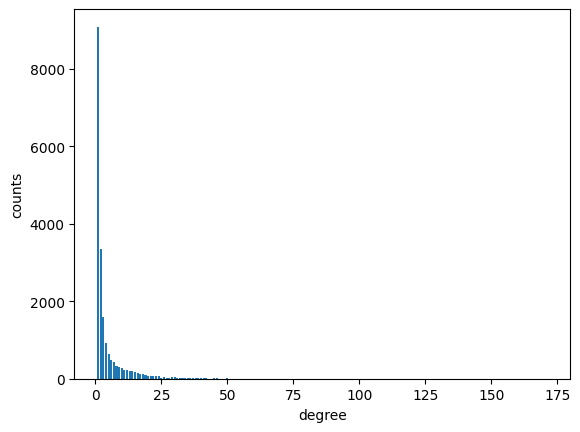

In [13]:
degree_sequence = sorted(
    (d for n, d in G.degree()),
    reverse=True,
)
plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.xlabel("degree")
plt.ylabel("counts")
plt.show()

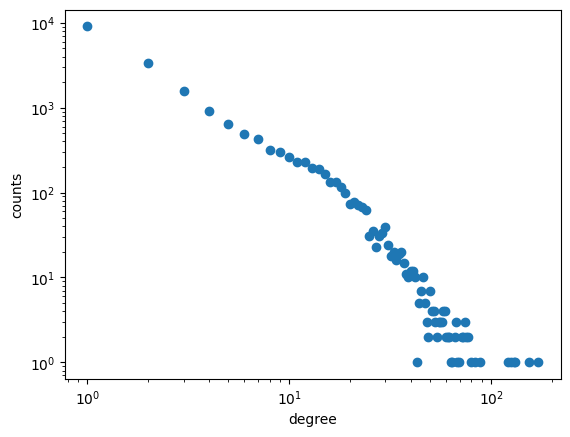

In [16]:
degree_sequence = sorted(
    (d for n, d in G.degree()),
    reverse=True,
)
plt.scatter(*np.unique(degree_sequence, return_counts=True))
plt.xlabel("degree")
plt.ylabel("counts")
plt.xscale("log")
plt.yscale("log")
plt.show()